# Analysis of demand data 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm, trange
import os
import xarray as xr

sns.set(style="darkgrid")

In [3]:
path_dem = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\demand\CAM4_F2000_p144_ctrl_demand_timeseries\CAM4_F2000_p144_ctrl_batch_0002.demand_EU15.nc"

data_dem = xr.open_dataset(path_dem, use_cftime=True, decode_times= True)


C:\Users\flore\AppData\Local\Temp\ipykernel_28824\331836140.py:3: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_dem = xr.open_dataset(path_dem, use_cftime=True, decode_times= True)


Mean Demand: 7.72
Variance: 0.34
Min Demand: 7.12
Max Demand: 9.39


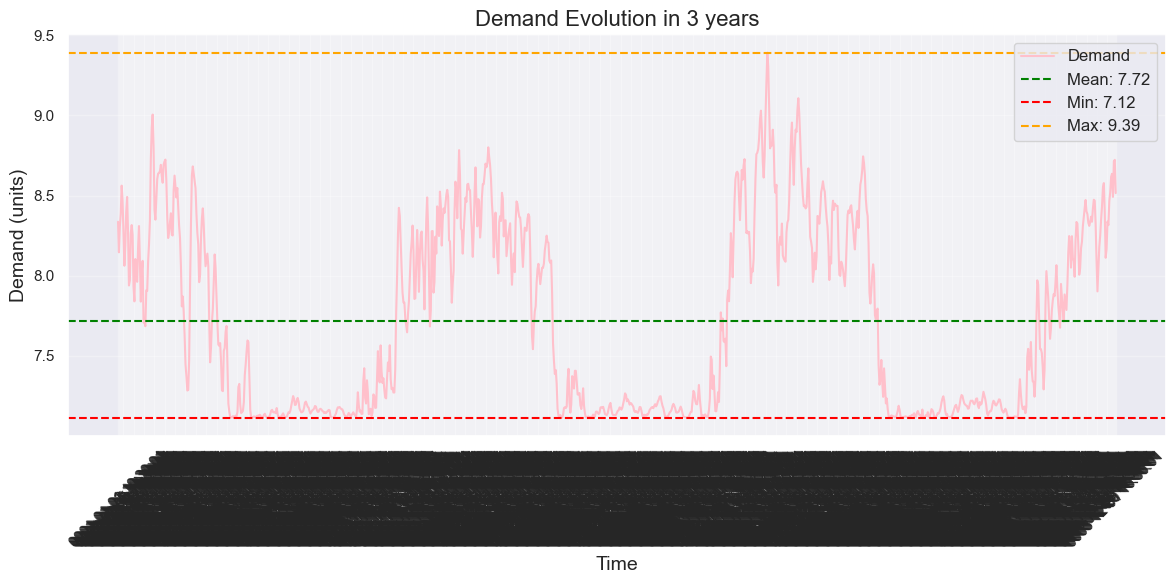

In [13]:
import matplotlib.pyplot as plt

# Extraction de la série de demande
demand_series = data_dem.Demand.isel(lat=0, lon=0)

# Extraire une tranche spécifique de la demande (par exemple, de l'indice 0 à 1095 pour 3 ans)
demand_slice = demand_series.isel(time=slice(0, 1095))

# Réduire les dimensions supplémentaires (lat, lon) pour obtenir une série 1D
demand_slice = demand_slice.squeeze()  # Supprime les dimensions de taille 1 (lat, lon)

# Obtenir les coordonnées temporelles (reste en cftime)
time_slice = demand_slice.time

# Conversion des objets cftime en chaînes pour éviter l'erreur OutOfBoundsDatetime
time_slice_str = [str(t) for t in time_slice.values]

# Calcul des statistiques pour la période sélectionnée
mean_demand = demand_slice.mean().values
variance_demand = demand_slice.var().values
min_demand = demand_slice.min().values
max_demand = demand_slice.max().values

# Affichage des statistiques
print(f"Mean Demand: {mean_demand:.2f}")
print(f"Variance: {variance_demand:.2f}")
print(f"Min Demand: {min_demand:.2f}")
print(f"Max Demand: {max_demand:.2f}")

# Créer le graphique en utilisant la tranche de temps et de demande
plt.figure(figsize=(12, 6))

# Tracer les données avec time_slice_str et demand_slice
plt.plot(time_slice_str, demand_slice.values, color='pink', label="Demand")

# Ajouter des lignes horizontales pour les statistiques (moyenne, min, max)
plt.axhline(mean_demand, color='green', linestyle='--', label=f"Mean: {mean_demand:.2f}")
plt.axhline(min_demand, color='red', linestyle='--', label=f"Min: {min_demand:.2f}")
plt.axhline(max_demand, color='orange', linestyle='--', label=f"Max: {max_demand:.2f}")

# Ajouter un titre et des étiquettes
plt.title("Demand Evolution in 3 years", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Demand (units)", fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotation des labels temporels pour les rendre lisibles
plt.grid(alpha=0.3)
plt.legend(fontsize=12)

# Ajuster la mise en page pour éviter le chevauchement
plt.tight_layout()

# Afficher le graphique
plt.show()










